## Loading Data


In [1]:
from google.colab import drive  # Import the necessary module for mounting Google Drive
drive.mount('/content/drive')  # Mount Google Drive to the specified directory '/content/drive'

Mounted at /content/drive


In [2]:
# Load the autoreload extension
%load_ext autoreload
# Set autoreload mode to 2
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
from collections import defaultdict
import re

## Data Preparation

In [4]:
# Define the file path for the True dataset
true_path = '/content/drive/MyDrive/Deep learning Final Project Notebooks/News-dataset/True.csv'
# Define the file path for the Fake dataset
fake_path = '/content/drive/MyDrive/Deep learning Final Project Notebooks/News-dataset/Fake.csv'

# Read the True dataset into a pandas DataFrame
true_df = pd.read_csv(true_path)
# Read the Fake dataset into a pandas DataFrame
fake_df = pd.read_csv(fake_path)


In [5]:
display(true_df)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [6]:
display(fake_df)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


## Data Visualization - Subject Distribution and Word Clouds


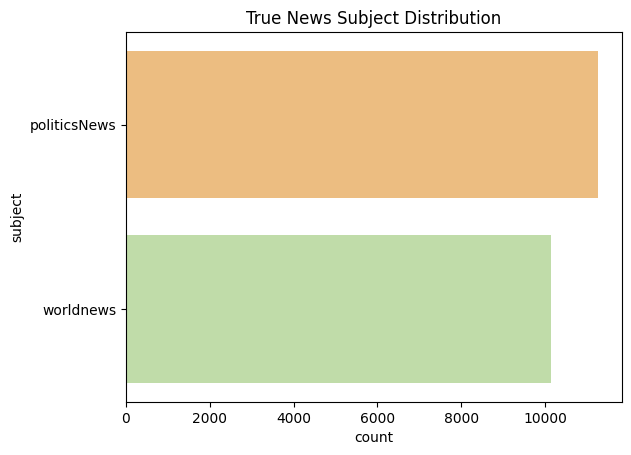

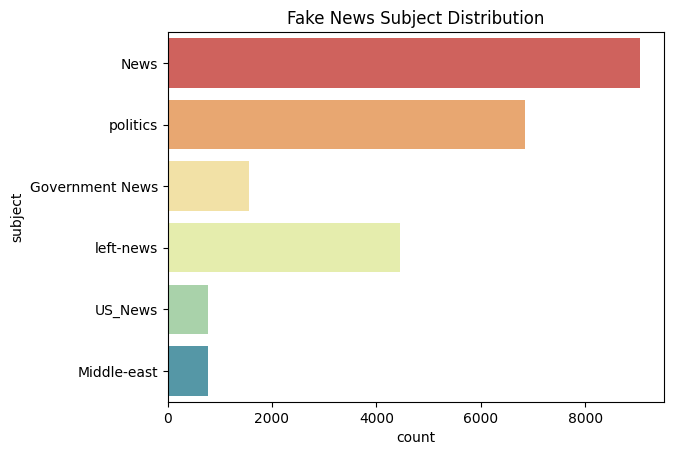

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of True News subjects using a countplot
sns.countplot(y="subject", palette="Spectral", data=true_df).set_title('True News Subject Distribution')
plt.show()

# Plot the distribution of Fake News subjects using a countplot
sns.countplot(y="subject", palette="Spectral", data=fake_df).set_title('Fake News Subject Distribution')
plt.show()

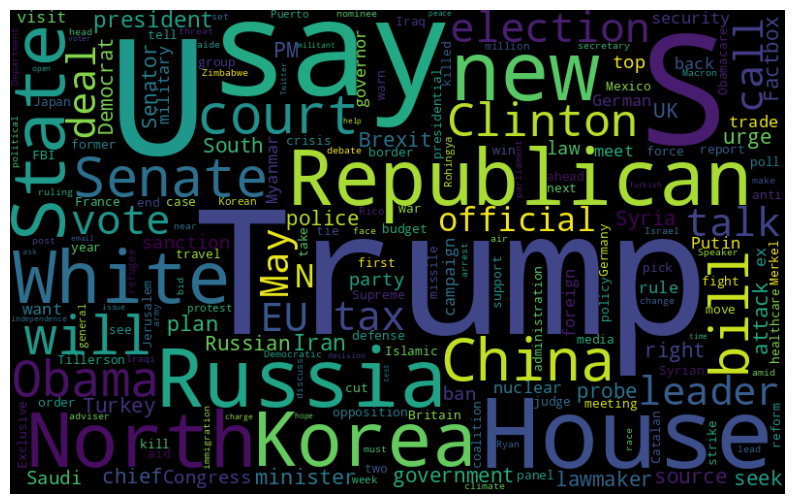

In [8]:
# Import the WordCloud module
from wordcloud import WordCloud
# Get the titles from the true_df DataFrame
real_titles = true_df.title
# Convert the titles into a list
real_titles_ls = [text for text in real_titles]
# Join all the titles into a single string
real_all_words = ' '.join(real_titles)
# Create a WordCloud object with specified settings
wordcloud_real = WordCloud(background_color='black',
                           width=800, height=500,
                           max_font_size=180,
                           collocations=False).generate(real_all_words)
# Create a figure with specified size
plt.figure(figsize=(10, 7))
# Display the WordCloud image
plt.imshow(wordcloud_real, interpolation='bilinear')
# Remove the axis labels
plt.axis("off")
# Show the plot
plt.show()

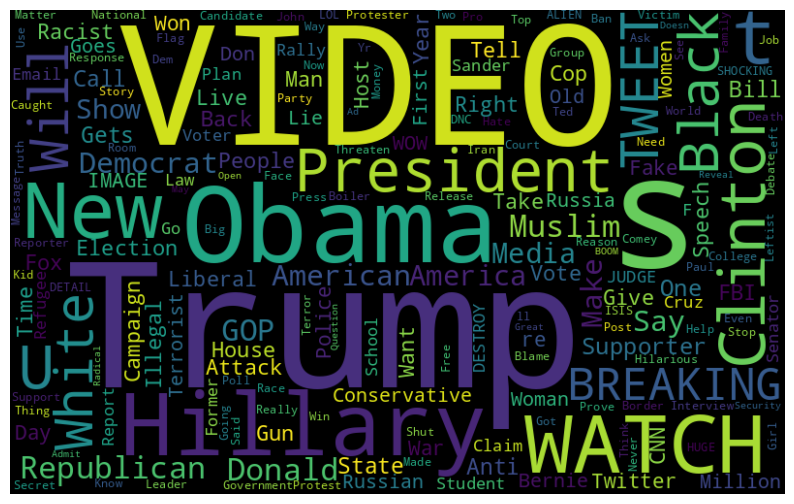

In [9]:
# Get the titles from the fake_df DataFrame
fake_titles = fake_df.title
# Convert the titles into a list
fake_titles_ls = [text for text in fake_titles]
# Join all the titles into a single string
fake_all_words = ' '.join(fake_titles)
# Create a WordCloud object with specified settings
wordcloud_fake = WordCloud(background_color='black',
                           width=800, height=500,
                           max_font_size=180,
                           collocations=False).generate(fake_all_words)
# Create a figure with specified size
plt.figure(figsize=(10, 7))
# Display the WordCloud image
plt.imshow(wordcloud_fake, interpolation='bilinear')
# Remove the axis labels
plt.axis("off")
# Show the plot
plt.show()

In [10]:
# Remove the 'subject' and 'date' columns from the true_df DataFrame
true_df = true_df.drop(['subject', 'date'], axis=1)
# Display the modified true_df DataFrame
display(true_df)

,title,text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...
...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l..."
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...


In [11]:
# Remove the 'subject' and 'date' columns from the false_df DataFrame
fake_df=fake_df.drop(['subject','date'],axis=1)
# Display the modified false_df DataFrame
display(fake_df)

,title,text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...
...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...


In [12]:
# Add Labels to both df
true_df['label'] = 1
fake_df['label'] = 0

# Concat
df = pd.concat([true_df, fake_df])
display(df)

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0


In [13]:
from sklearn.utils import shuffle

# Select only the first and last columns of the DataFrame
df = df.iloc[:, [0, -1]]
# Shuffle the rows of the DataFrame
df = shuffle(df).reset_index(drop=True)
# Display the modified DataFrame
display(df)

,title,label
0,Mississippi lawmakers approve religion bill am...,1
1,WOW! TRUMP/CLINTON CAMPAIGNS GO AT IT In Post-...,0
2,Argentina abandons rescue mission for crew of ...,1
3,Obama Celebrates Iran Deal As Senior Iranian O...,0
4,How Egypt's changing culture led one emigre to...,1
...,...,...
44893,COMEY EDITS REVEALED: Clinton Probe Remarks Wa...,0
44894,DISNEY WORKER TELLS HORROR STORY OF BEING FORC...,0
44895,Trump's pick to lead U.S. CFTC unveils major n...,1
44896,WATCH: Gay Man Beaten After Lunatic Sees Him ...,0


In [14]:
# Split the DataFrame into a train set and a test set
train_split_df = df.sample(frac=0.8)  # 80% of the data for train set
test_df = df.drop(train_split_df.index)  # Remaining 20% of the data for test set

# Further split the train set into a smaller train set and a validation set
train_df = train_split_df.sample(frac=0.8)  # 80% of the train set for smaller train set

# Reset the index of the train and test sets
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# Print the sizes of the train and test sets
print('train set size:', train_df.shape)
print('test set size:', test_df.shape)


train set size: (28734, 2)
test set size: (8980, 2)


In [15]:
train_df.to_csv('train.tsv', sep='\t', index=False)
test_df.to_csv('test.tsv', sep='\t', index=False)

In [16]:
# Concatenate the train and test sets back into a single DataFrame
df = pd.concat([train_df, test_df])

# Display the concatenated DataFrame
display(df)

,title,label
0,LIBERAL AMERICAN STUDENT Gets Brutal Lesson In...,0
1,HILLARY GIVES HILARIOUS Reason For Losing Elec...,0
2,Justice Department seeks more time on Trump wi...,1
3,Republicans Not Willing To Defend Trump On-Ai...,0
4,What will be in Obama's final budget proposal?,1
...,...,...
8975,FEDERAL JUDGE STEPS IN To Review Legroom On Co...,0
8976,Is A GOP Civil War Coming? RNC Chair Accident...,0
8977,"Contenders, picks for key jobs in Trump's admi...",1
8978,COMEY EDITS REVEALED: Clinton Probe Remarks Wa...,0


## Data Preprocessing

### Removing stopwords

In [17]:
import nltk
# Download stopwords from NLTK
nltk.download("stopwords")

# Import stopwords from NLTK corpus
from nltk.corpus import stopwords

# Get the list of English stopwords
stop_words = stopwords.words('english')

# Add additional stopwords to the list
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
      # Check if the token is not a stopword, has a length greater than 3, and is not in the additional stop_words
      if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
        result.append(token)
    return result

In [19]:
import gensim
# Applying The Function To The Dataframe
df['clean'] = df['title'].apply(preprocess)

In [20]:
list_of_words = []  # Initialize an empty list to store individual words
for i in df.clean:  # Iterate over each entry in the 'clean' column of the DataFrame
    for j in i:  # Iterate over each word in the entry
        list_of_words.append(j)  # Append the word to the list_of_words

total_words = len(list(set(list_of_words)))  # Count the total number of unique words
display(total_words)  # Display the total number of unique words

18267

### using tokenizer to create Tokens

In [21]:
from nltk import word_tokenize

In [22]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer

# Creating A Tokenizer To Tokenize The Words And Create Sequences Of Tokenized Words
tokenizer = Tokenizer(num_words=total_words)  # Initialize a Tokenizer object with a specified maximum number of words
tokenizer.fit_on_texts(train_df['title'])  # Fit the Tokenizer on the training data titles

train_sequences = tokenizer.texts_to_sequences(train_df['title'])  # Convert the training data titles to sequences of tokenized words
test_sequences = tokenizer.texts_to_sequences(test_df['title'])  # Convert the test data titles to sequences of tokenized words


In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Adding Padding to the training sequences
padded_train = pad_sequences(train_sequences, maxlen=20, padding='post', truncating='post')

# Adding Padding to the testing sequences
padded_test = pad_sequences(test_sequences, maxlen=20, padding='post', truncating='post')


# **BERT**

In [24]:
!pip install transformers

import torch
from transformers import BertTokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 78.2 MB/s eta 0:00:00


### Processing Data for BERT model

In [25]:
# Importing necessary libraries
from torch.utils.data import Dataset

# Defining a custom dataset class for the fake news dataset
class FakeNewsDataset(Dataset):
    def __init__(self, mode, tokenizer):
        assert mode in ['train', 'test']
        self.mode = mode
        self.df = pd.read_csv(mode + '.tsv', sep='\t').fillna("")
        self.len = len(self.df)
        self.tokenizer = tokenizer  # BERT tokenizer

    def __getitem__(self, idx):
        # Getting the statement and label for the specified index
        if self.mode == 'test':
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)
        else:
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)
            
        # Tokenizing the statement using the BERT tokenizer
        word_pieces = ['[CLS]']
        statement = self.tokenizer.tokenize(statement)
        word_pieces += statement + ['[SEP]']
        len_st = len(word_pieces)
        
        # Converting the tokenized words to token IDs
        ids = self.tokenizer.convert_tokens_to_ids(word_pieces)
        tokens_tensor = torch.tensor(ids)
        
        # Creating the segments tensor
        segments_tensor = torch.tensor([0] * len_st, dtype=torch.long)
        
        return (tokens_tensor, segments_tensor, label_tensor)

    def __len__(self):
        # Returning the length of the dataset
        return self.len

# Initializing the training and testing datasets
trainset = FakeNewsDataset('train', tokenizer=tokenizer)
testset = FakeNewsDataset('test', tokenizer=tokenizer)

# Printing the sizes of the trainset and testset
print('trainset size:', trainset.__len__())
print('testset size:', testset.__len__())


trainset size: 28734
testset size: 8980


In [26]:
display(trainset.df["title"])
display(trainset.df["label"])

0        LIBERAL AMERICAN STUDENT Gets Brutal Lesson In...
1        HILLARY GIVES HILARIOUS Reason For Losing Elec...
2        Justice Department seeks more time on Trump wi...
3         Republicans Not Willing To Defend Trump On-Ai...
4           What will be in Obama's final budget proposal?
                               ...                        
28729    Obama surprises Vice President Biden with Meda...
28730    Italy calls confidence votes in Senate on new ...
28731    TREASURY DEPT Depicts Lady Liberty As A Black ...
28732    UPDATE: TRANSGENDER TARGET BOYCOTT Reaches Boi...
28733    WATCH: DESPERATE FOR RATINGS, Megyn Kelly Goes...
Name: title, Length: 28734, dtype: object

0        0
1        0
2        1
3        0
4        1
        ..
28729    1
28730    1
28731    0
28732    0
28733    0
Name: label, Length: 28734, dtype: int64

In [27]:
titles = trainset.df["title"]
labels = trainset.df["label"]

In [28]:
from sklearn.model_selection import train_test_split

#Split data into training and testing dataset
#We teach our model based on the training set (including the labels)
#We take the labels away to test our model with the testing set

x_train, x_test, y_train, y_test = train_test_split(titles, labels, test_size=0.2, random_state=1000)

In [29]:
!pip install tensorflow-text
import tensorflow_hub as hub
import tensorflow_text as text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 53.8 MB/s eta 0:00:00


### Creating BERT Model

In [30]:
import tensorflow as tf

# Check if GPU is available and set the device accordingly
if tf.test.gpu_device_name():
    device = tf.device('/GPU:0')
    print('Using GPU')
else:
    device = tf.device('/CPU:0')
    print('Using CPU')

with device:
    # Use the BERT preprocesser and BERT encoder from TensorFlow Hub
    bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
    bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

    # Define the input layer
    input_layer = tf.keras.layers.Input(shape=(), dtype=tf.string, name='news')

    # Preprocess the input using the BERT preprocesser
    processed = bert_preprocess(input_layer)

    # Encode the preprocessed input using the BERT encoder
    output = bert_encoder(processed)

    # Apply dropout to the pooled output from BERT
    layer = tf.keras.layers.Dropout(0.2, name='dropout')(output['pooled_output'])

    # Add a fully connected layer with 2000 neurons and ReLU activation
    layer = tf.keras.layers.Dense(2000, activation='relu', name='hidden')(layer)
    layer = tf.keras.layers.ReLU()(layer)

    # Add another fully connected layer with 2500 neurons and ReLU activation
    layer = tf.keras.layers.Dense(2500, activation='relu', name='hidden2')(layer)

    # Apply ReLU activation to the layer
    layer = tf.keras.layers.ReLU()(layer)

    # Add the output layer with sigmoid activation for binary classification
    layer = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(layer)

    # Create the model with input and output layers
    model = tf.keras.Model(inputs=[input_layer], outputs=[layer])


Using GPU


In [31]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 news (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['news[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

### Training the model

In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 5

train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

for epoch in range(epochs):
    # Train the model for one epoch
    history = model.fit(x_train, y_train, epochs=1, verbose=1)
    
    # Get the train loss and accuracy for the current epoch
    train_loss.append(history.history['loss'][0])
    train_accuracy.append(history.history['accuracy'][0])
    
    # Evaluate the model on the test data
    loss, accuracy = model.evaluate(x_test, y_test)
    
    # Store the test loss and accuracy for the current epoch
    test_loss.append(loss)
    test_accuracy.append(accuracy)


180/180 [==============================] - 65s 360ms/step - loss: 0.2439 - accuracy: 0.8991


### Displaying Network architecture

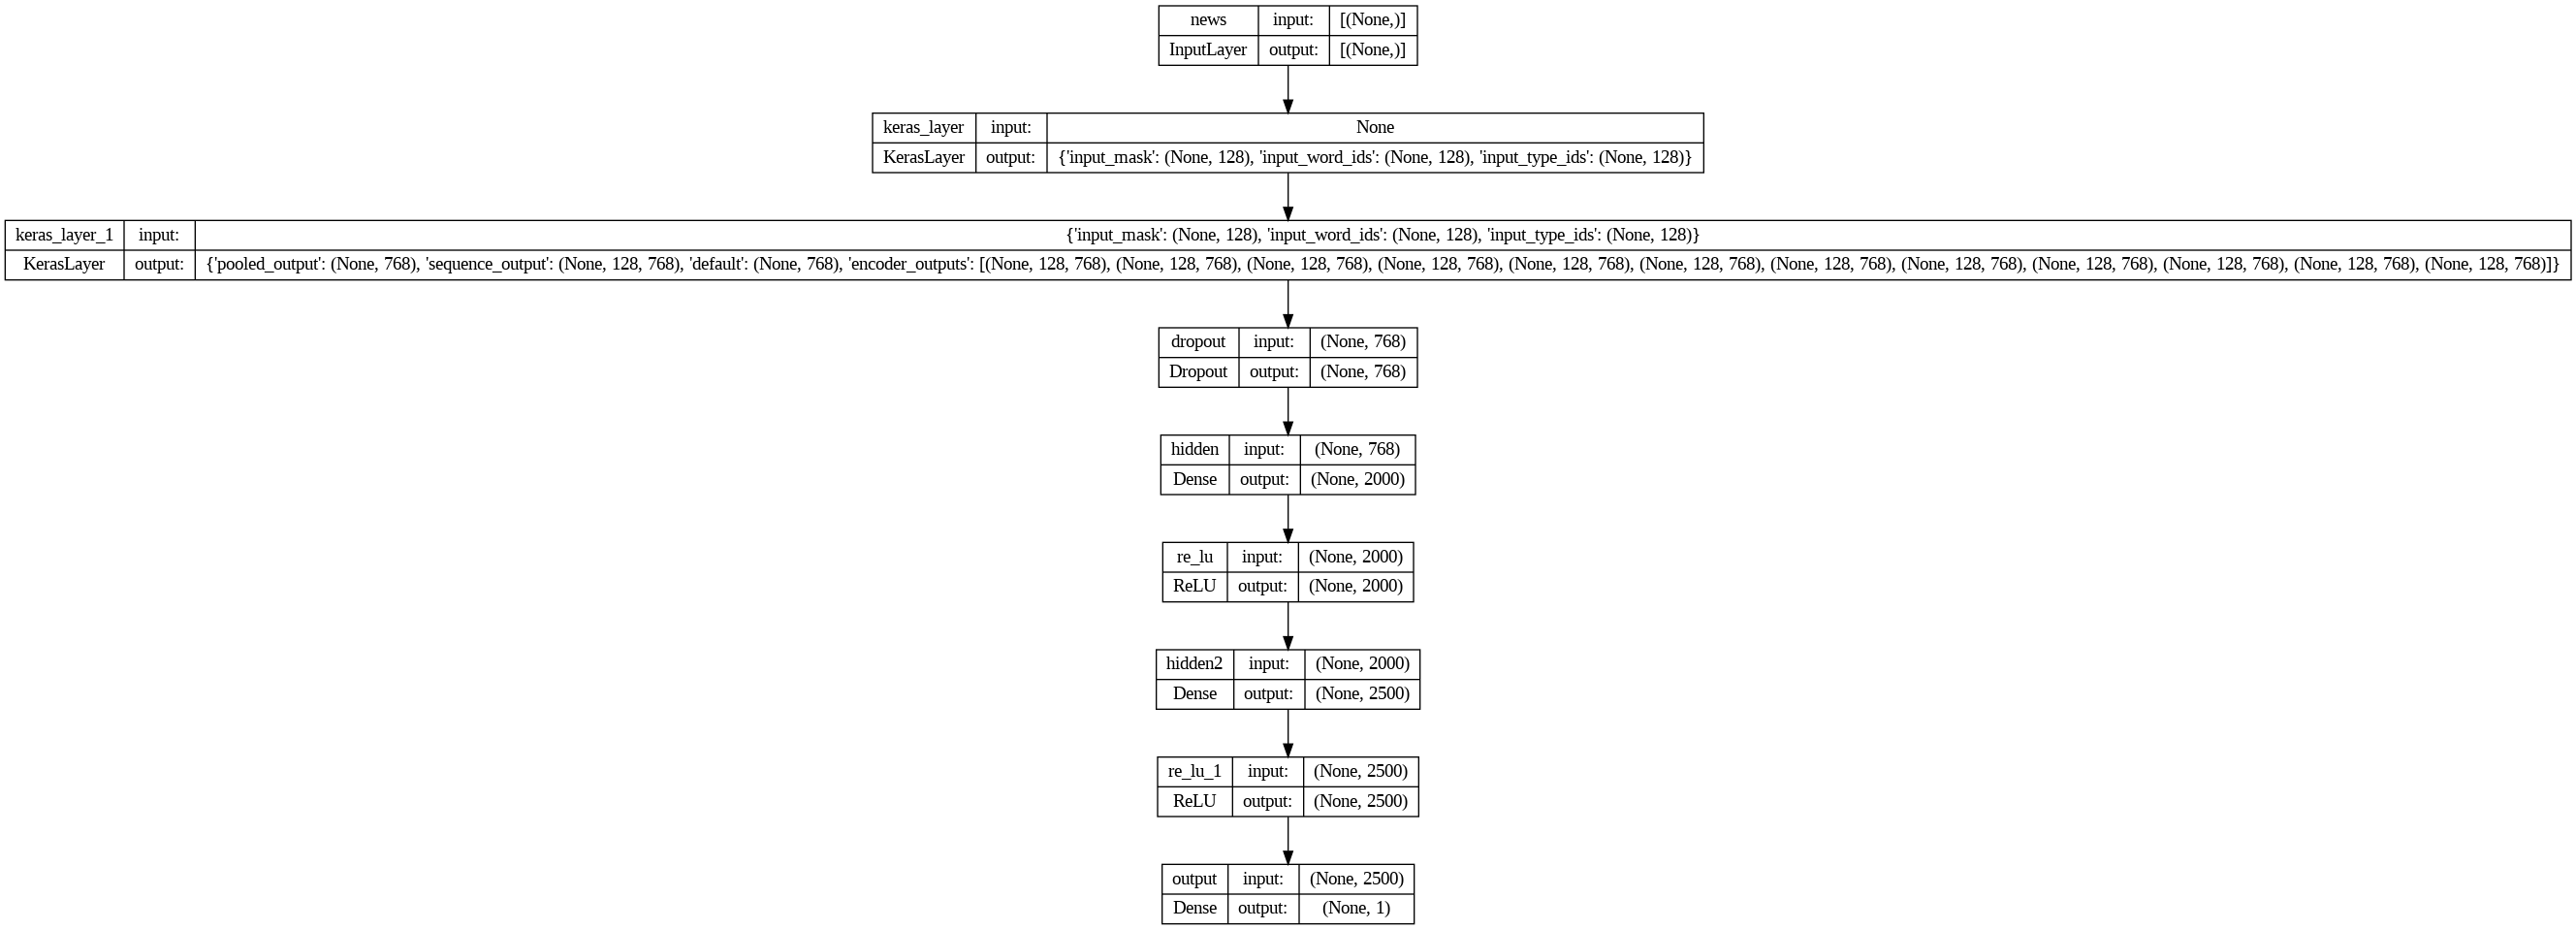

In [33]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_bert.png', show_shapes=True, show_layer_names=True)

### Plotting confusion matrix and accuracy

180/180 [==============================] - 68s 367ms/step
[[0.86192053 0.05977264]
 [0.13807947 0.94022736]]
Acc: 0.8990777797111537
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      2981
           1       0.86      0.94      0.90      2766

    accuracy                           0.90      5747
   macro avg       0.90      0.90      0.90      5747
weighted avg       0.90      0.90      0.90      5747



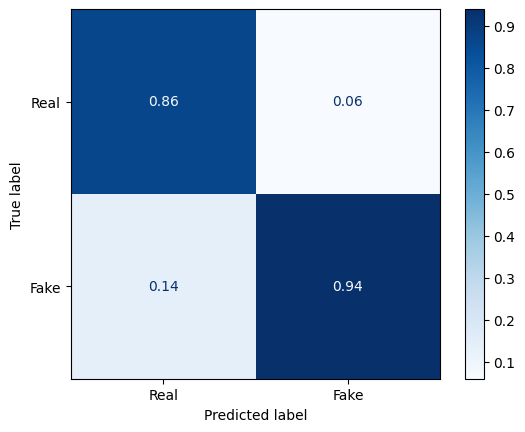

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Get predictions from the model
predictions = model.predict(x_test)

# Convert predictions to binary values
binary_predictions = (predictions > 0.5).astype(int)

# Calculate the confusion matrix
# The labels argument specifies the order of the classes in the matrix
# The normalize argument is set to 'pred' to normalize the matrix by the predicted column
cm = confusion_matrix(y_test, binary_predictions, labels=[1, 0], normalize='pred')
print(cm)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
disp.plot(cmap=plt.cm.Blues)

# Calculate the accuracy
accuracy = accuracy_score(binary_predictions, y_test)
print('Acc:', accuracy)

# Generate the classification report
report = classification_report(y_test, binary_predictions)
print(report)


### Accuracy

In [35]:
# Calculate the accuracy
accuracy = accuracy_score(binary_predictions, y_test)
print('Accuracy Achieved:', accuracy)

Accuracy Achieved: 0.8990777797111537


### Plotting train vs test loss and train vs test accuracy

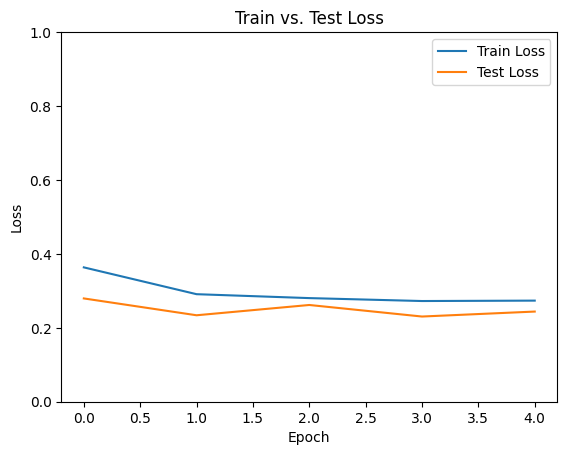

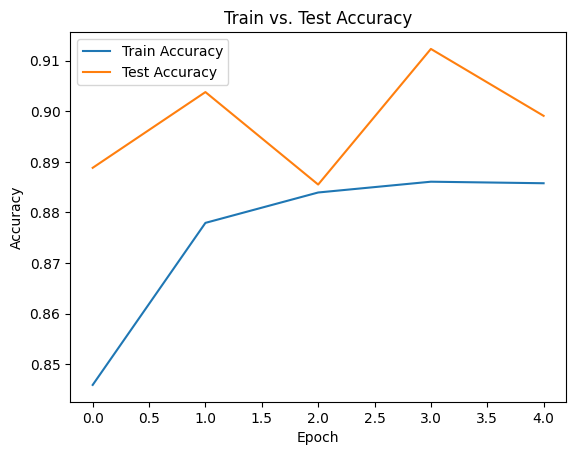

In [36]:
import matplotlib.pyplot as plt

# Plot the train and test loss
plt.figure()
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Train vs. Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 1) 
plt.legend()
plt.show()

# Plot the train and test accuracy
plt.figure()
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Train vs. Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **LSTM**

### Creating LSTM Model

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout, BatchNormalization

# Set the number of embedding vector features
embedding_vector_features = 40

# Create a Sequential model
model = Sequential()

# Add an Embedding layer
# The input dimension is set to total_words, and the output dimension is set to embedding_vector_features
# The input_length is set to 20 to match the length of the padded sequences
model.add(Embedding(total_words, embedding_vector_features, input_length=20))

# Add a Dropout layer for regularization
model.add(Dropout(0.3))

# Add a LSTM layer with 500 units and return sequences
model.add(LSTM(500, return_sequences=True))

# Add a Dropout layer for regularization
model.add(Dropout(0.2))

# Add another LSTM layer with 500 units
model.add(LSTM(500))

# Add a Dropout layer for regularization
model.add(Dropout(0.3))

# Add a Dense layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Print the model summary
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            730680    
                                                                 
 dropout (Dropout)           (None, 20, 40)            0         
                                                                 
 lstm (LSTM)                 (None, 20, 500)           1082000   
                                                                 
 dropout_1 (Dropout)         (None, 20, 500)           0         
                                                                 
 lstm_1 (LSTM)               (None, 500)               2002000   
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense (Dense)               (None, 1)                 5

### Creating LSTM Model

In [38]:
y_train = np.asarray(train_df['label'])
y_test = np.asarray(test_df['label'])

# Compile the model with the specified optimizer, loss function, and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set the number of epochs
epochs = 5

# Initialize empty lists to store train and test metrics
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

# Iterate over the specified number of epochs
for epoch in range(epochs):
    # Train the model for one epoch
    history = model.fit(padded_train, y_train, epochs=1, verbose=1)
    
    # Get the train loss and accuracy for the current epoch
    train_loss.append(history.history['loss'][0])
    train_accuracy.append(history.history['accuracy'][0])
    
    # Evaluate the model on the test data
    loss, accuracy = model.evaluate(padded_test, y_test)
    test_loss.append(loss)
    test_accuracy.append(accuracy)


281/281 [==============================] - 2s 6ms/step - loss: 0.1624 - accuracy: 0.9650


### Network Architecture

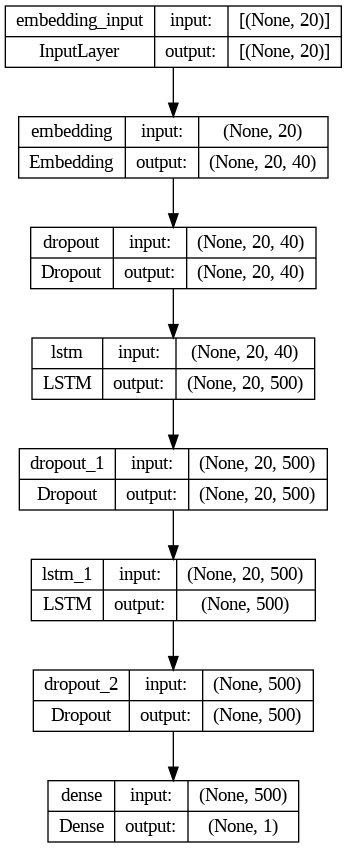

In [39]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_lstm.png', show_shapes=True, show_layer_names=True)

### Plotting confusion matrix and accuracy

281/281 [==============================] - 2s 4ms/step
Accuracy:  0.9650334075723831
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      4745
           1       0.97      0.95      0.96      4235

    accuracy                           0.97      8980
   macro avg       0.97      0.96      0.96      8980
weighted avg       0.97      0.97      0.97      8980



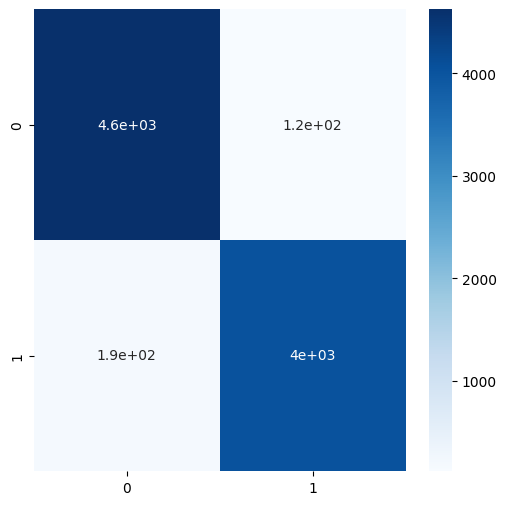

In [40]:
# Making predictions on the test data
prediction = (model.predict(padded_test) > 0.5).astype("int32")

# Calculating the accuracy
from sklearn.metrics import accuracy_score
y_test = np.asarray(test_df['label'])
accuracy = accuracy_score(list(y_test), prediction)

print("Accuracy: ", accuracy)

# Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)

# Plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, cmap="Blues", linecolor='black', annot=True)

# Generating the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))


### Accuracy

In [42]:
# Calculate the accuracy
accuracy = accuracy_score(list(y_test), prediction)
print("Accuracy: ", accuracy)

Accuracy:  0.9650334075723831


### Plotting train vs test loss and train vs test accuracy

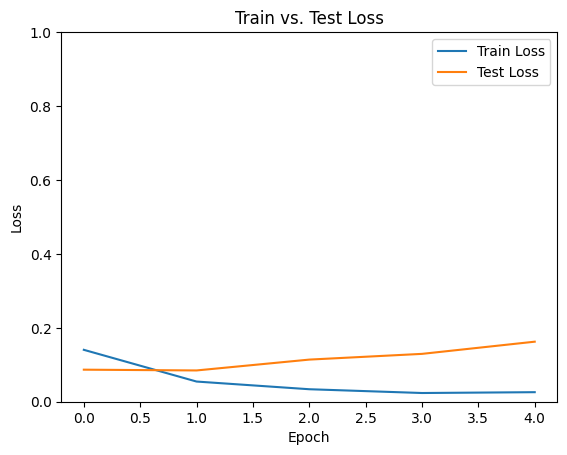

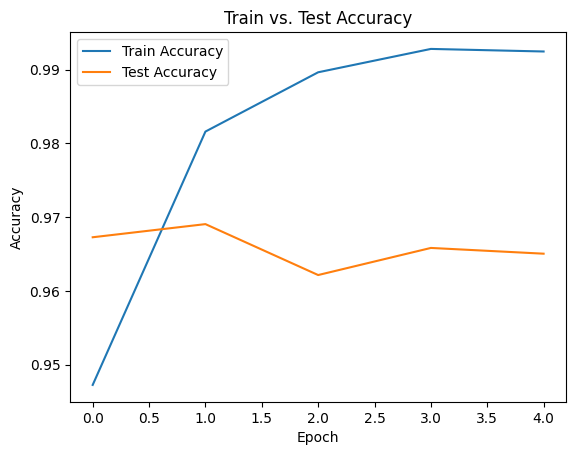

In [43]:
import matplotlib.pyplot as plt

# Plot the train and test loss
plt.figure()
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Train vs. Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 1) 
plt.legend()
plt.show()

# Plot the train and test accuracy
plt.figure()
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Train vs. Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Creating BiLSTM Model

In [44]:
# Creating the model using Bidirectional LSTM
embedding_vector_features = 40
model = Sequential()

# Embedding layer
model.add(Embedding(total_words, embedding_vector_features, input_length=20))

# Dropout layer
model.add(Dropout(0.3))

# Bidirectional LSTM layer with return_sequences=True to get sequences from both directions
model.add(Bidirectional(LSTM(500, return_sequences=True)))

# Dropout layer
model.add(Dropout(0.2))

# Bidirectional LSTM layer
model.add(Bidirectional(LSTM(500)))

# Dropout layer
model.add(Dropout(0.3))

# Output dense layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            730680    
                                                                 
 dropout_3 (Dropout)         (None, 20, 40)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 20, 1000)         2164000   
 l)                                                              
                                                                 
 dropout_4 (Dropout)         (None, 20, 1000)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 1000)             6004000   
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 1000)             

### Training the model

In [45]:
# Converting labels to NumPy arrays
y_train = np.asarray(train_df['label'])
y_test = np.asarray(test_df['label'])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 5
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

for epoch in range(epochs):
    # Train the model for one epoch
    history = model.fit(padded_train, y_train, epochs=1, verbose=1)
    
    # Get the train loss and accuracy for the current epoch
    train_loss.append(history.history['loss'][0])
    train_accuracy.append(history.history['accuracy'][0])
    
    # Evaluate the model on the test data
    loss, accuracy = model.evaluate(padded_test, y_test)
    test_loss.append(loss)
    test_accuracy.append(accuracy)


281/281 [==============================] - 3s 10ms/step - loss: 0.1306 - accuracy: 0.9669


### Network Architecture

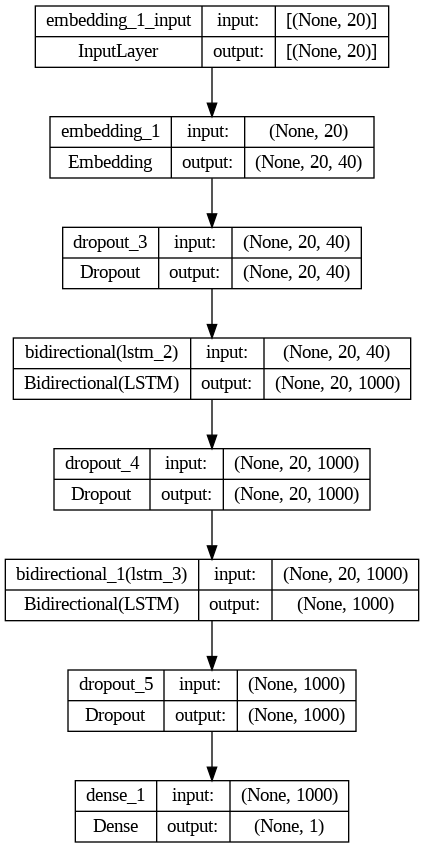

In [46]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_bilstm.png', show_shapes=True, show_layer_names=True)

### Plotting confusion matrix and accuracy

281/281 [==============================] - 4s 8ms/step
Accuracy:  0.9669265033407572
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      4745
           1       0.96      0.97      0.97      4235

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



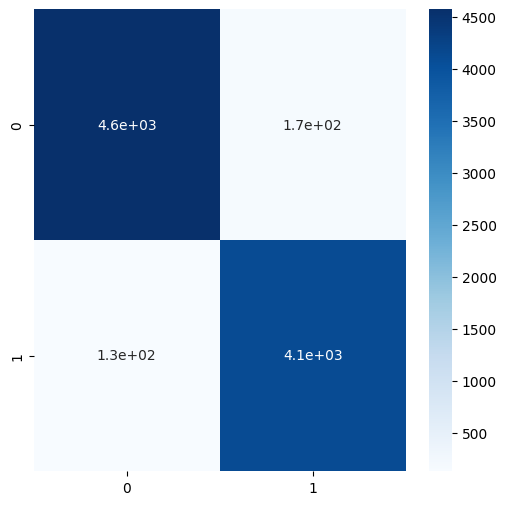

In [47]:
# Making predictions
prediction = (model.predict(padded_test) > 0.5).astype("int32")

# Getting the accuracy
y_test = np.asarray(test_df['label'])
accuracy = accuracy_score(list(y_test), prediction)
print("Accuracy: ", accuracy)

# Getting the confusion matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, cmap="Blues", linecolor='black', annot=True)

# Printing the classification report
print(classification_report(y_test, prediction))


### Accuracy

In [48]:
# Calculate the accuracy
accuracy = accuracy_score(list(y_test), prediction)
print("Accuracy: ", accuracy)

Accuracy:  0.9669265033407572


### Plotting train vs test loss and train vs test accuracy

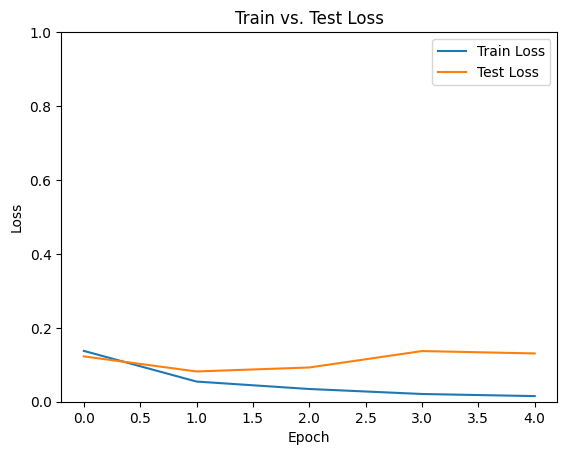

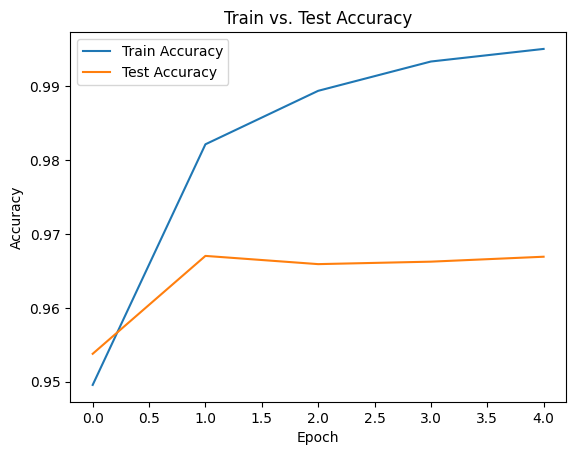

In [49]:
import matplotlib.pyplot as plt

# Plot the train and test loss
plt.figure()
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Train vs. Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 1) 
plt.legend()
plt.show()

# Plot the train and test accuracy
plt.figure()
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Train vs. Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()